In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/Projects-AkdemirLab/pipelines/PyUtils')
import xenium_pyutils
sys.path.append('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/Projects-AkdemirLab/pipelines/Python.utils/plots')
import rgb_converter

In [3]:
plot_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.4/plots'

In [4]:
p46p_adata= sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.4/data/p46p_cellseg_new.h5ad')
p67p_adata= sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.4/data/p67p_cellseg_new.h5ad')

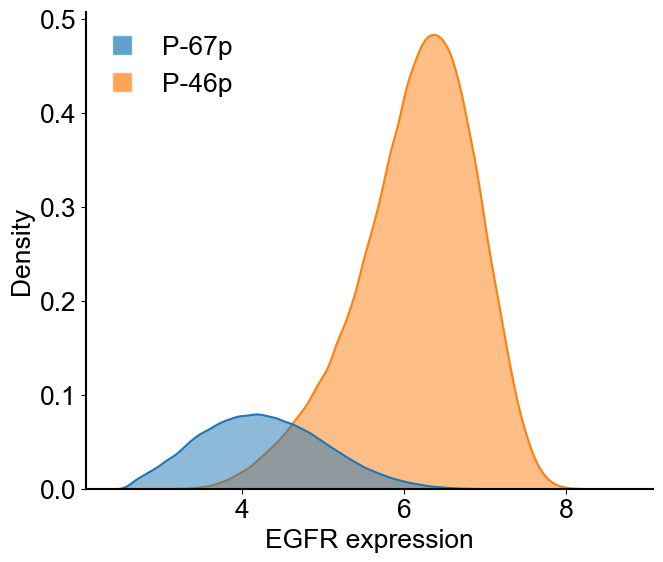

In [6]:
import matplotlib.patches as mpatches

## Fig 6H
df = p46p_adata[:, 'EGFR'].to_df()
df['sample'] = 'p46P'
df2 = p67p_adata[:,'EGFR'].to_df()
df2['sample'] = 'p67P'
df = pd.concat([df, df2])
df ['sample'] = pd.Categorical(df['sample'], categories=['p67P','p46P'])

plt.rcParams.update({'font.family': 'Arial', 'font.size': 19})

fig, ax = plt.subplots(figsize=(7, 6))

# Create the KDE plot with legend=False to manually create our own legend
kde_plot = sns.kdeplot(data=df[df['EGFR'] > 0], x='EGFR', hue='sample', fill=True, 
                      palette='tab10', alpha=0.5, linewidth=1.5, ax=ax, legend=False)

# Get the sample names and create square markers for the legend
handles, labels = [], []
for i, sample in enumerate(['p67P', 'p46P']):
    # Create square markers instead of patches
    square = plt.Line2D([0], [0], marker='s', color='w', alpha=0.7,markerfacecolor=plt.cm.tab10(i), 
                        markersize=15, label=sample)
    handles.append(square)
    labels.append(sample)

# Add the legend with square markers
ax.legend(handles=handles, labels=['P-67p', 'P-46p'], title='', 
          frameon=False, bbox_to_anchor=(0.3, 1), handletextpad=0.5)

ax.set_title('')
ax.set_xlabel('EGFR expression')
ax.set_ylabel('Density')
sns.despine()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
plt.tight_layout()

# Save the figure
fig.savefig(f'{plot_dir}/EGFR_expression_density_plot.png', dpi=300, bbox_inches='tight')